In [18]:
import warnings
warnings.filterwarnings('ignore')

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [20]:
train_data = pd.read_csv("../dataset/train_model_processed_data.csv")
print(train_data.shape)

(1000, 9)


In [21]:
train_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,cluster
0,female,group B,bachelor's degree,standard,none,72,72,74,2
1,female,group C,some college,standard,completed,69,90,88,2
2,female,group B,master's degree,standard,none,90,95,93,2
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,2


<IPython.core.display.Javascript object>


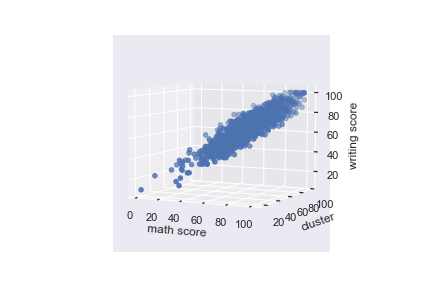

In [12]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
sns.set(style = "darkgrid")
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = train_data['math score']
y = train_data['reading score']
z = train_data['writing score']

ax.set_xlabel("math score")
ax.set_ylabel("reading score")
ax.set_zlabel("writing score")

ax.scatter(x, y, z)

plt.show()

In [22]:
train_data.describe()

,math score,reading score,writing score,cluster
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,1.560000
std,15.16308,14.600192,15.195657,0.496635
min,0.00000,17.000000,10.000000,1.000000
25%,57.00000,59.000000,57.750000,1.000000
50%,66.00000,70.000000,69.000000,2.000000
75%,77.00000,79.000000,79.000000,2.000000
max,100.00000,100.000000,100.000000,2.000000


In [23]:
train_data.groupby('cluster').describe()

math score                                                        \
             count       mean        std   min   25%   50%    75%    max   
cluster                                                                    
1            440.0  53.706818  10.908731   0.0  48.0  55.0  61.25   76.0   
2            560.0  75.817857  10.096442  51.0  68.0  75.0  82.00  100.0   

        reading score                                                      \
                count       mean       std   min   25%   50%   75%    max   
cluster                                                                     
1               440.0  56.225000  9.437569  17.0  51.0  58.0  63.0   73.0   
2               560.0  79.339286  8.689386  60.0  73.0  78.0  85.0  100.0   

        writing score                                                       
                count       mean        std   min   25%   50%   75%    max  
cluster                                                                     
1               440.0  54.743182  10.266603  10.0  49.0  56.0  62.0   75.0  
2               560.0  78.512500   8.991540  61.0  72.0  77.0  84.0  100.0

In [24]:
''' 1) By Looking at the cluster Data
                                         math reading   writing
        Cluster  1 Students Subject  AVG  55,    58,       56
        Cluster  2 Students Subjects AVG  75,    78,       77
        Cluster 2 Students are scoring better that Cluster 1 Students
'''        

' 1) By Looking at the cluster Data \n        Cluster  2 Students Subjects AVG 75, 78, 77\n        Cluster  1 Students Subject AVG 55, 58, 56\n        Cluster 2 Students are scoring better that Cluster 1 \n'

In [25]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
non_numerical_feature = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']

<AxesSubplot:ylabel='cluster'>

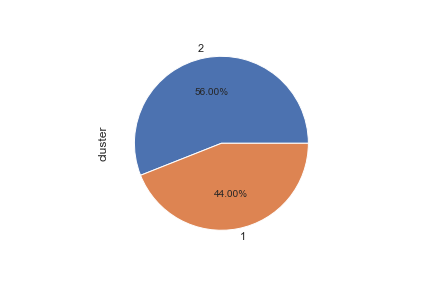

In [26]:
train_data['cluster'].value_counts().plot.pie(autopct = '%1.2f%%')

In [ ]:
'''2) In the Data 
        population of the Cluster 2 is more than the Cluster 1
''' 

In [34]:
plt.rcParams["figure.figsize"]=20,20

--------------------------------gender--------------------------------------
gender
female    518
male      482
Name: gender, dtype: int64


cluster    1    2
gender           
female   198  320
male     242  240


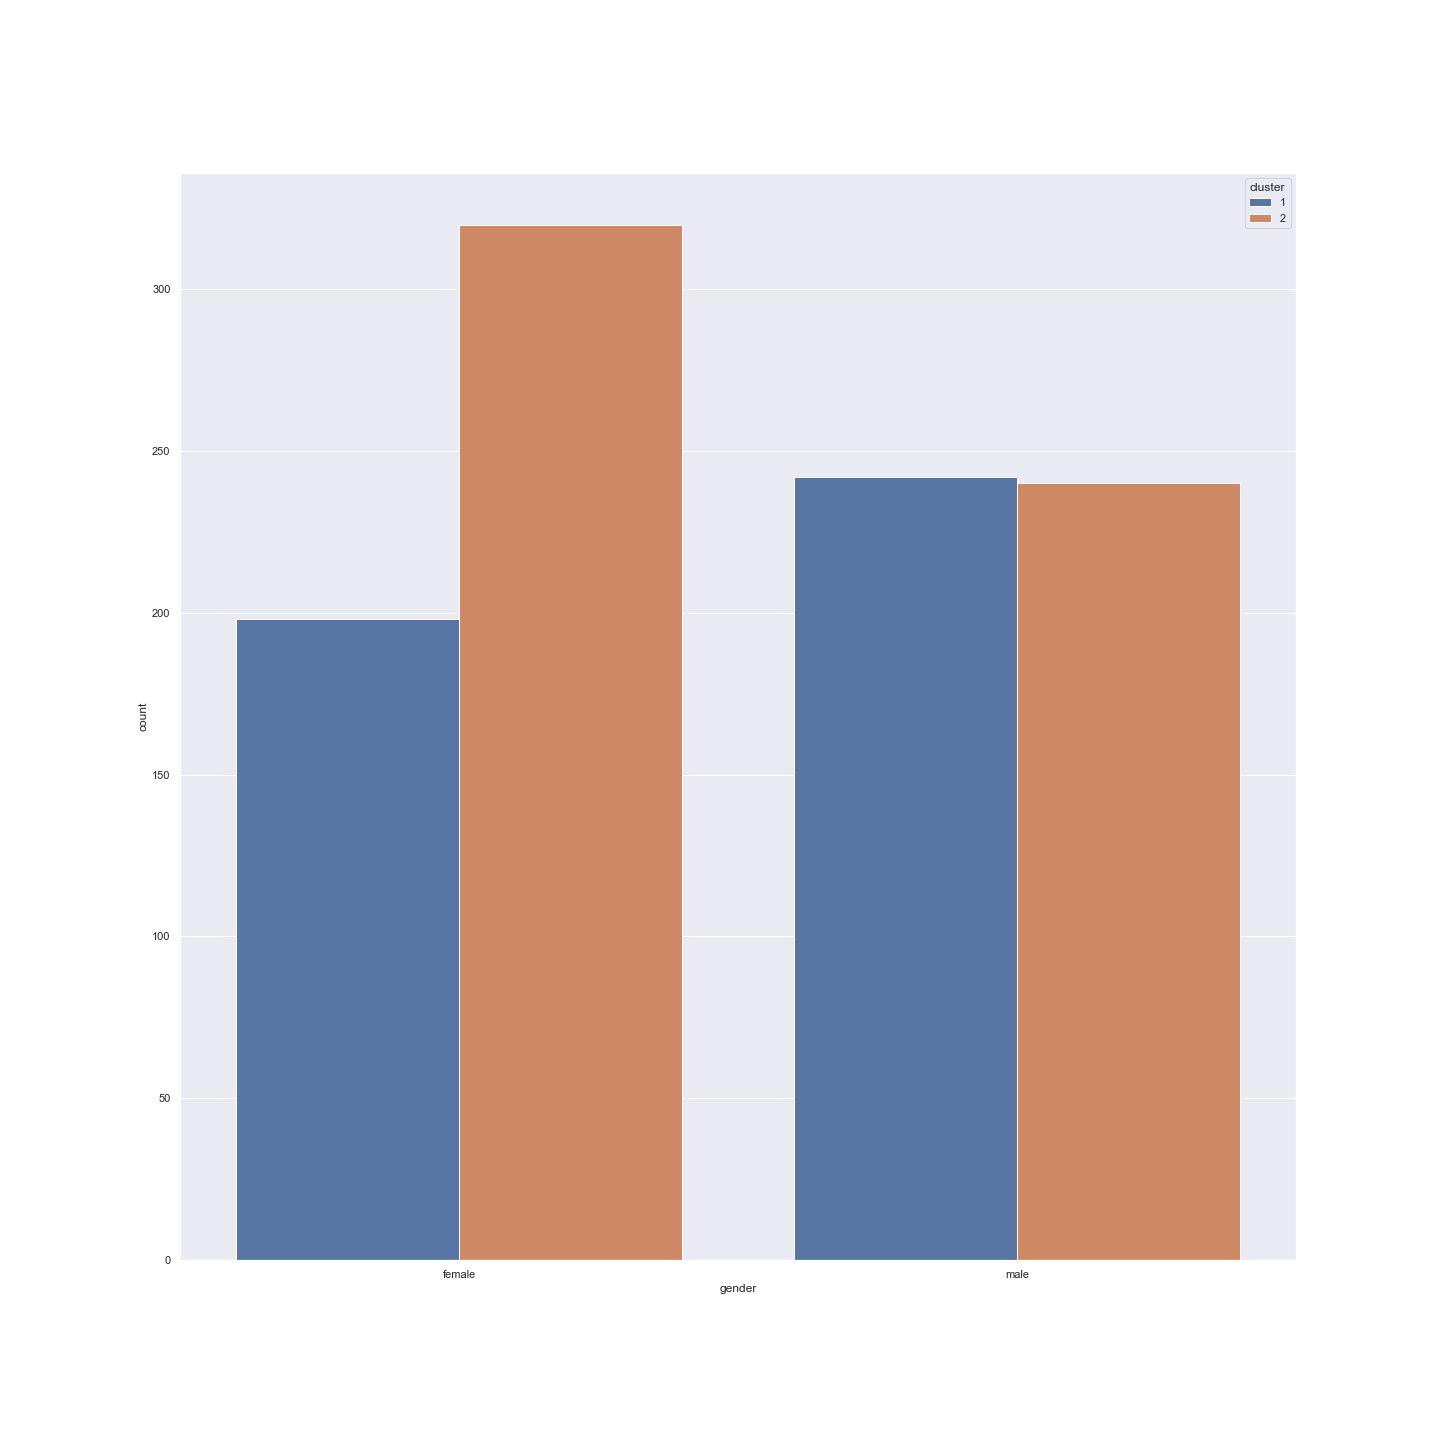

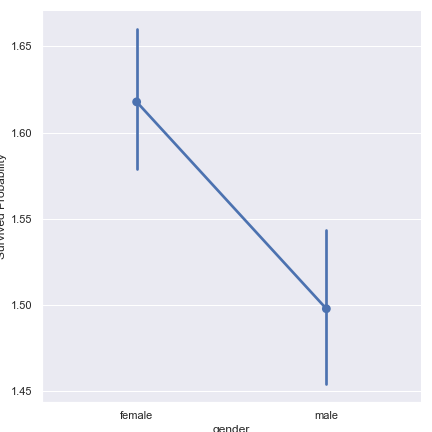

--------------------------------------------------------------------------------


--------------------------------race/ethnicity--------------------------------------
race/ethnicity
group A     89
group B    190
group C    319
group D    262
group E    140
Name: race/ethnicity, dtype: int64


cluster           1    2
race/ethnicity          
group A          54   35
group B         102   88
group C         139  180
group D         103  159
group E          42   98


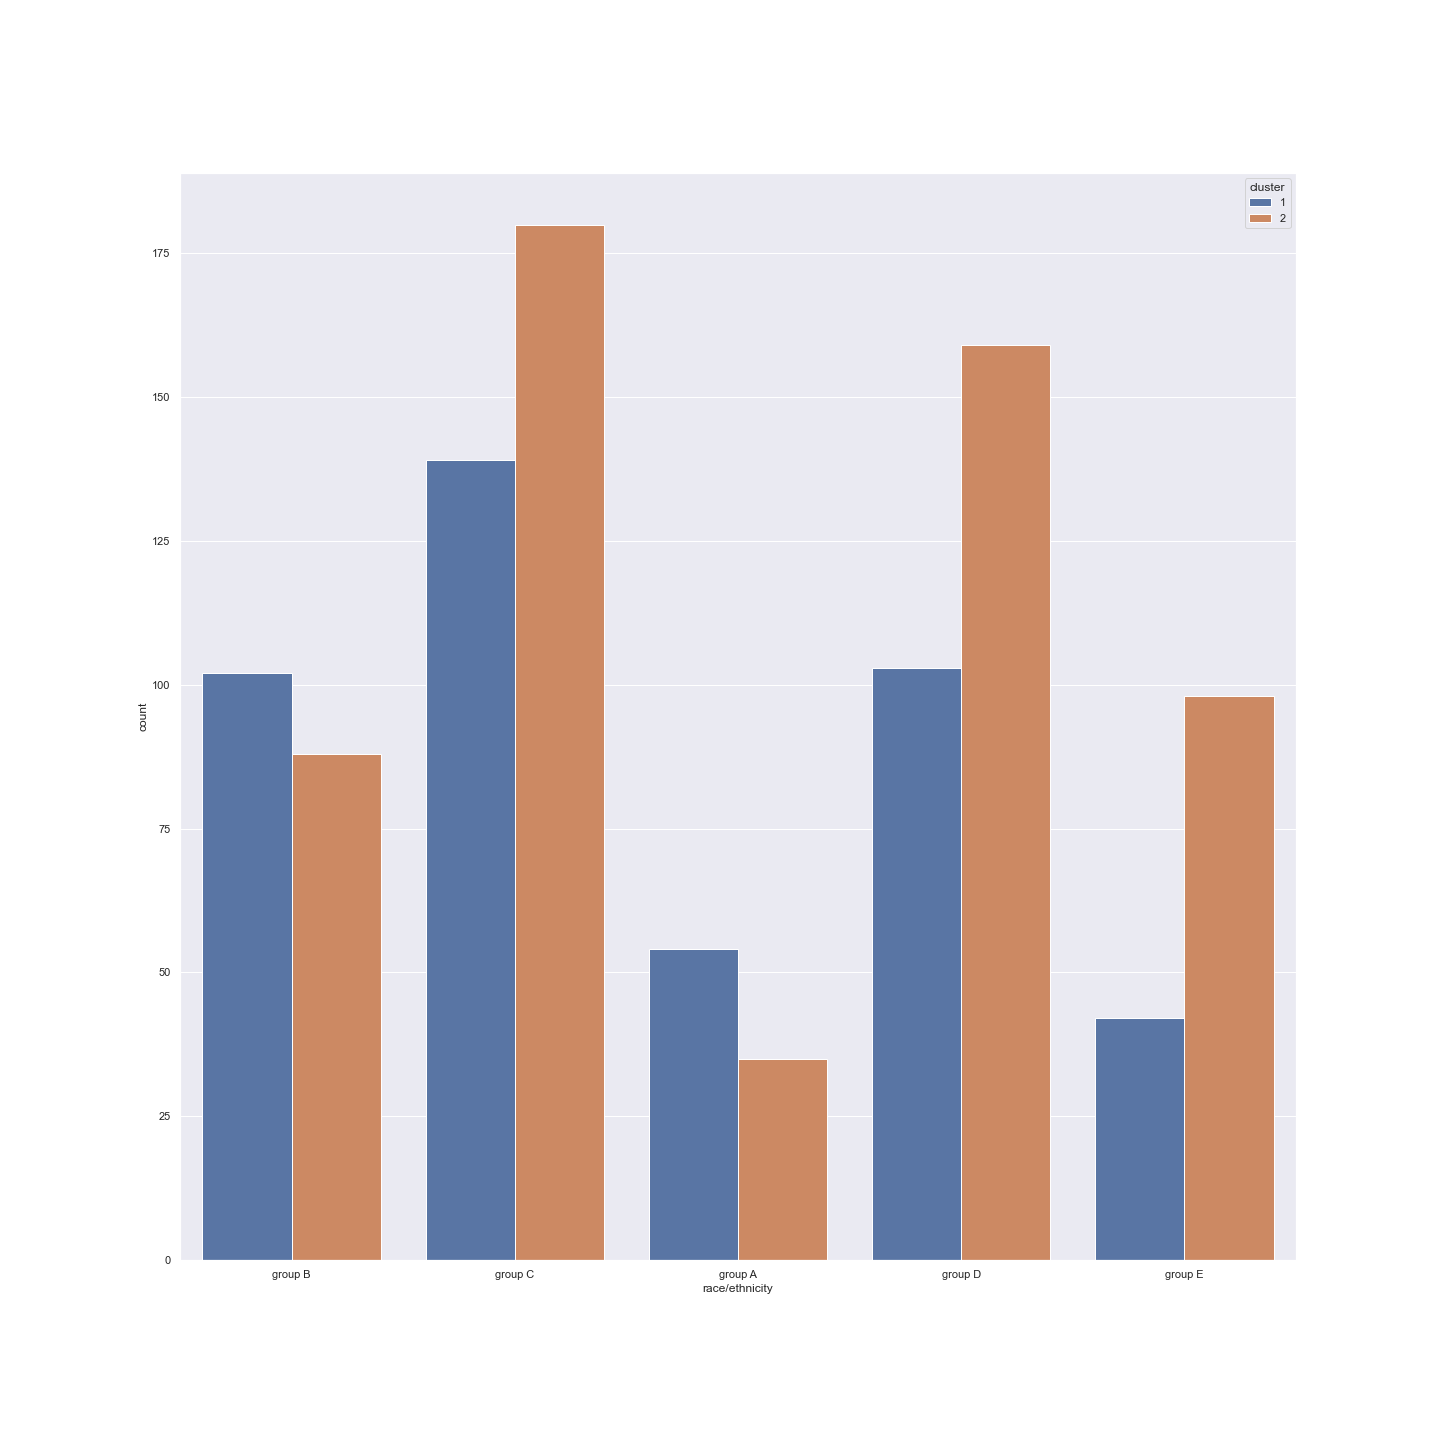

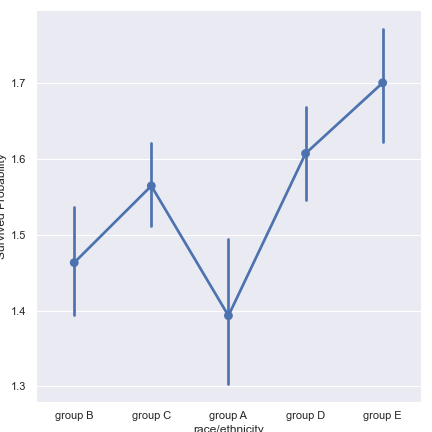

--------------------------------------------------------------------------------


--------------------------------parental level of education--------------------------------------
parental level of education
associate's degree    222
bachelor's degree     118
high school           196
master's degree        59
some college          226
some high school      179
Name: parental level of education, dtype: int64


cluster                        1    2
parental level of education          
associate's degree            88  134
bachelor's degree             37   81
high school                  109   87
master's degree               20   39
some college                  97  129
some high school              89   90


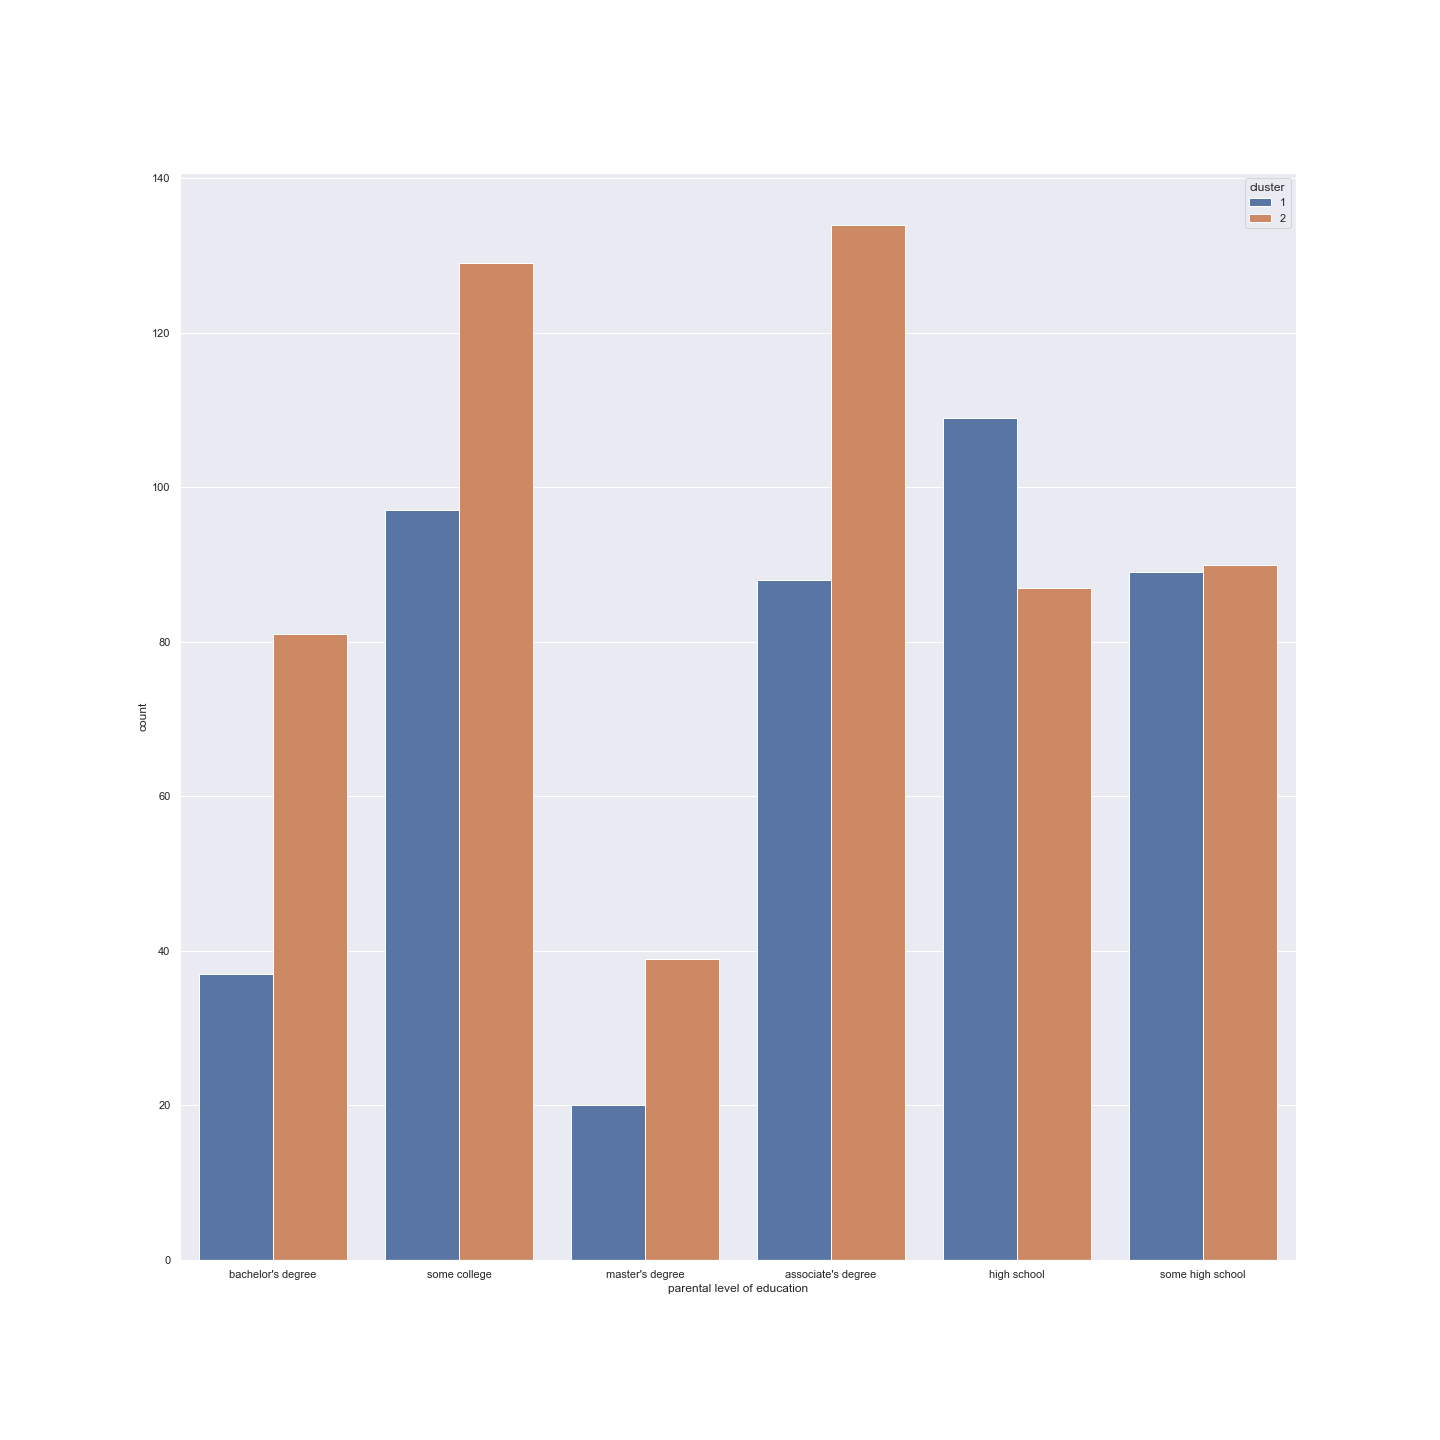

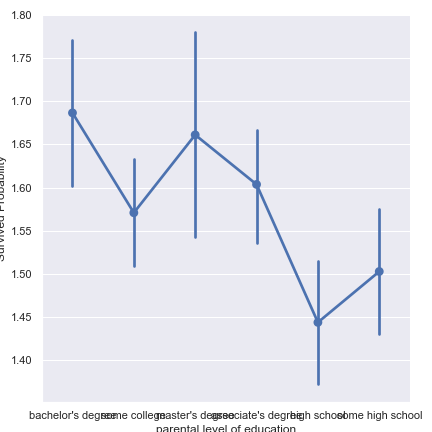

--------------------------------------------------------------------------------


--------------------------------lunch--------------------------------------
lunch
free/reduced    355
standard        645
Name: lunch, dtype: int64


cluster         1    2
lunch                 
free/reduced  212  143
standard      228  417


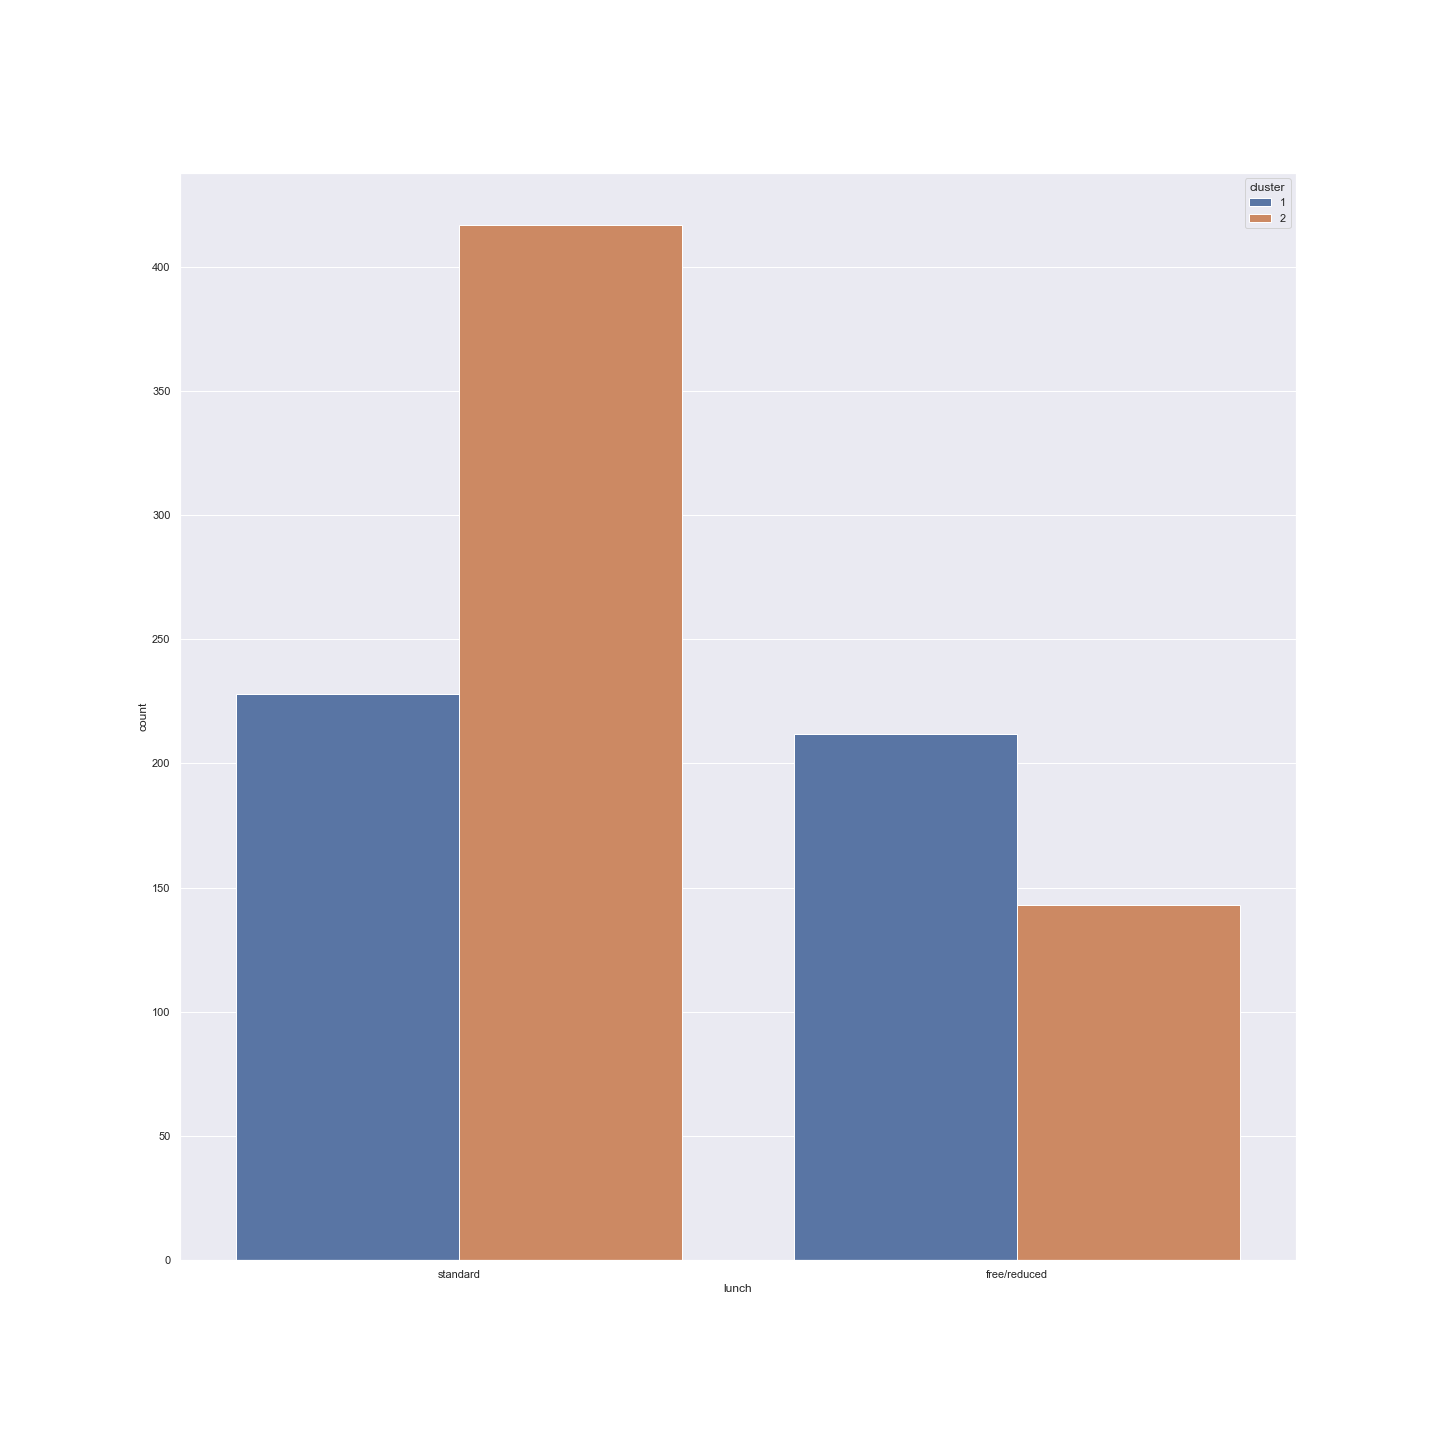

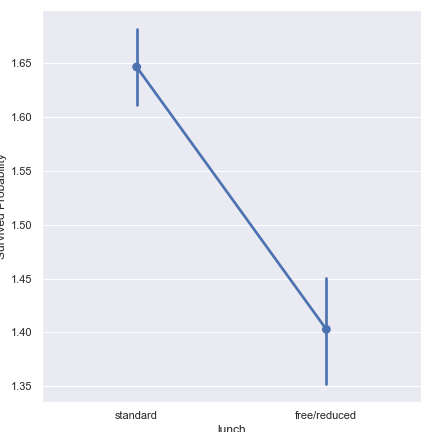

--------------------------------------------------------------------------------


--------------------------------test preparation course--------------------------------------
test preparation course
completed    358
none         642
Name: test preparation course, dtype: int64


cluster                    1    2
test preparation course          
completed                110  248
none                     330  312


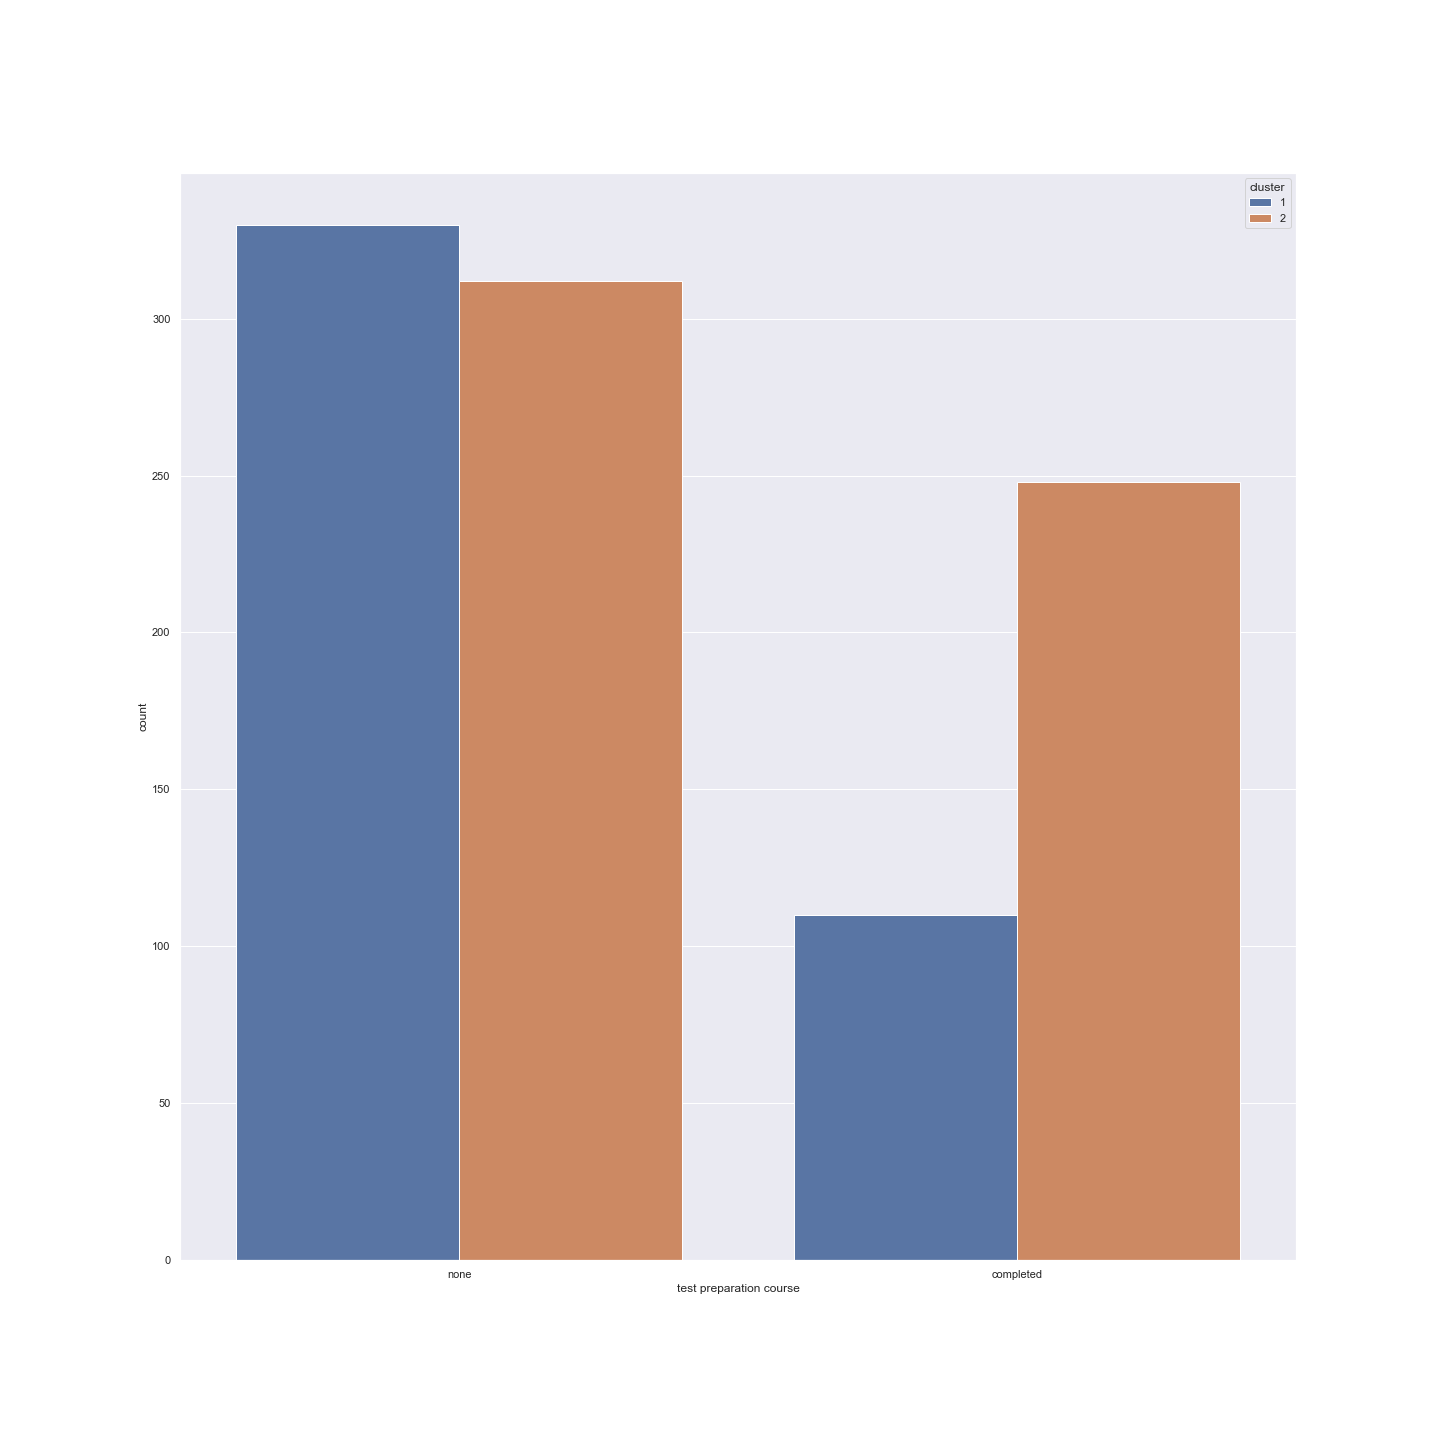

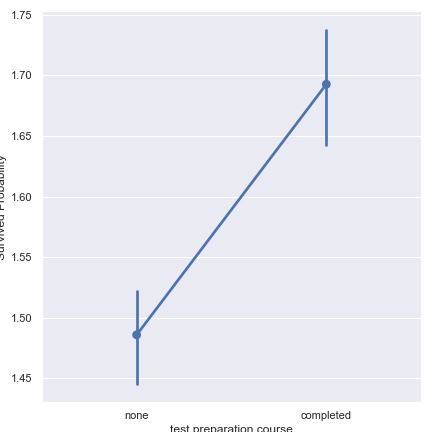

--------------------------------------------------------------------------------




In [35]:
for feature in non_numerical_feature:
    if feature != "cluster":
        print(f"--------------------------------{feature}--------------------------------------")
        print(train_data.groupby(feature)[feature].count())
        print("\n")
        print(pd.crosstab(train_data[feature], train_data["cluster"]))
        sns.countplot(feature, data = train_data, hue = 'cluster')
        plt.show()
        g = sns.factorplot(x=feature, y="cluster", data=train_data, size=6)
        g.set_ylabels("Survived Probability")
        plt.show()
        print(f"--------------------------------------------------------------------------------\n\n")

In [ ]:
'''
    2) Gender 
        Performance Sequence Best to Least
        female > male
        -> Students of "female"  Gender  is more likely to score best compared to male.
        
    3) race/ethnicity
        Performance Sequence Best to Least
        Group E > Group D > Group C  > Group B > Group A
        -> Students of "Group E"  race/ethnicity  is more likely to score best compared to all the other.
        -> Students of "Group A"  race/ethnicity  is more likely score least compared to all the other. 
    
    4) parental level of education
        Performance Sequence Best to Least
        bachelor's degree > master's degree > associate's degree > some college > some high school > high school    
        -> Parent's Education Level who have "bachelor's degree" is more likely to score best compared to all the other education level.
        -> Parent's Education Level who have "high school" is more likely score least compared to all the other education level.
    
    5) lunch
        Performance Sequence Best to Least
        standard > free/reduced
    
    6) ** test preparation course
        Performance Sequence Best to Least
        completed > none
        -> The Students who have Completed the have more likely to score better 
        
        
'''

--------------------------------math score--------------------------------------------


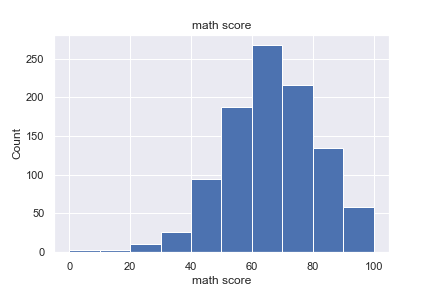

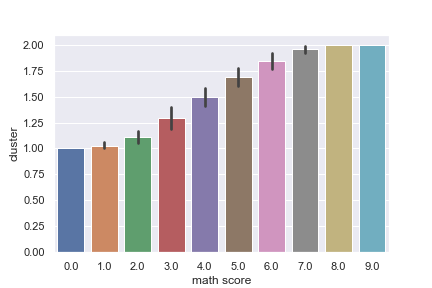

-------------------------------math score END--------------------------------------------


--------------------------------reading score--------------------------------------------


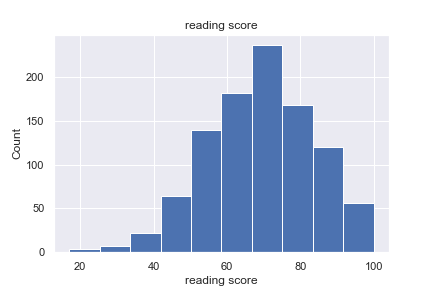

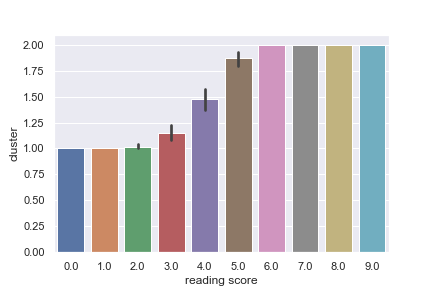

-------------------------------reading score END--------------------------------------------


--------------------------------writing score--------------------------------------------


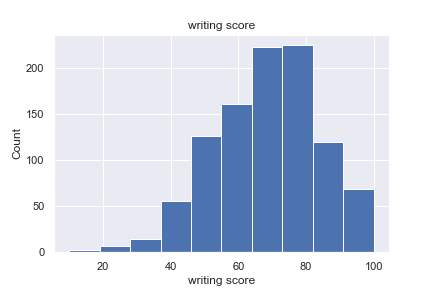

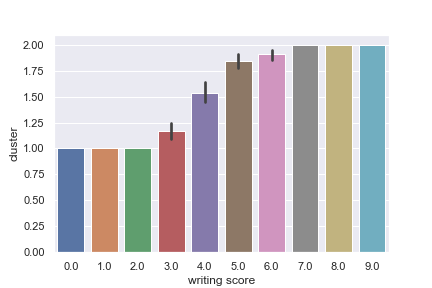

-------------------------------writing score END--------------------------------------------




In [31]:
from sklearn.preprocessing import KBinsDiscretizer
from numpy import mean
features = [feature for feature in train_data.columns if feature != "cluster" and train_data[feature].dtypes != 'O' ]
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(train_data[features]),index=train_data[features].index, columns=train_data[features].columns)
Y=train_data[['cluster']]
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

for feature in features:
    print(f"--------------------------------{feature}--------------------------------------------")
    data=train_data.copy()
    data[feature].hist(bins=10)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()
    sns.barplot(x=feature, y="cluster",data=X_bin_combined, estimator=mean )
    plt.show()
    print(f"-------------------------------{feature} END--------------------------------------------\n\n")